In [18]:
import pandas as pd
import numpy as np
from datetime import datetime
import pickle

#From spacy, we are going to use 'es_dep_news_trf'
import spacy
nlp = spacy.load('es_dep_news_trf')

#Wordclouds:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

#NLTK
#TexBlov
#Gensim
#SpaCy

In [2]:
df = pd.read_csv('../mining/raw_tweets.csv')
#This can solve us some headaches:
df = df.dropna()

df

,User,Tweet,Left
0,@PODEMOS,aunque unos pocos reaccionarios quieran encerr...,1.0
1,@PODEMOS,tu salud no puede esperar más.\n\nqueremos que...,1.0
2,@PODEMOS,"presentamos la ley de salud mental para, desde...",1.0
3,@PODEMOS,"📽️ @isaserras: ""no hay más excusas. se pueden ...",1.0
4,@PODEMOS,👉el pp lleva más de 1000 días bloqueando la re...,1.0
...,...,...,...
52133,@HorcajoXavier,@topoencerrado mire bien el gráfico donde apar...,0.0
52134,@HorcajoXavier,el aviso: “si no votáis la prórroga del estado...,0.0
52135,@HorcajoXavier,algo pasa en la web del ministerio de carolina...,0.0
52136,@HorcajoXavier,pompeo dice que hay “enormes evidencias” de qu...,0.0


In [3]:
tweet_prueba = 'Estamos viviendo una reacción antidemocrática por parte del CGPJ con el fin de bloquear los avances sociales y eximir la corrupción del PP. Si continúa esta deslegitimación del Poder Judicial, una solución sería su dimisión.\n\nLo explica @isaserras 👇 \n\n🔗 https://t.co/rnFzXvMU4e https://t.co/0Lar55hHvI'
print(tweet_prueba)

Estamos viviendo una reacción antidemocrática por parte del CGPJ con el fin de bloquear los avances sociales y eximir la corrupción del PP. Si continúa esta deslegitimación del Poder Judicial, una solución sería su dimisión.

Lo explica @isaserras 👇 

🔗 https://t.co/rnFzXvMU4e https://t.co/0Lar55hHvI


In [7]:

def token_tweet(tweet):
    #Tokenize

    tweet_tokenized = nlp(tweet)
    new_tweet = []
    
    #In the next step we are going to remove stop words
    #and lemmatize words
    for token in tweet_tokenized:
        if (token.text.isalpha() and not(token.is_stop)):#We are going to remove not alphanumeric tokens and stopwords
        #There is a problem, the lammatizer is going to confuse Podemos (political party) with podemos (VERB from poder)
        #we are going to make the change: Podemos ---> upodemos
            if(token.text.lower() == 'podemos'):
                new_tweet.append('upodemos')
            else:
                new_tweet.append(token.lemma_)
    
    #We return tweet tokenized and lemmatized as a tuple:
    final_tweet = tuple(new_tweet)    
    return(final_tweet)

token_tweet(tweet_prueba)

('vivir',
 'reacción',
 'antidemocrático',
 'CGPJ',
 'bloquear',
 'avance',
 'social',
 'y',
 'eximir',
 'corrupción',
 'PP',
 'continúar',
 'deslegitimación',
 'Judicial',
 'solución',
 'dimisión',
 'explicar')

In [8]:
list_tweets = tuple(df.loc[:,'Tweet'])
new_tweets = list()
print('Starting...')
i = 0
percent = int(len(list_tweets)/100)
            
ini = datetime.now()
for tweet in list_tweets:
    tokenized = token_tweet(tweet)
    new_tweets.append(tokenized)
    #We make the count:
    i += 1
    if(i%percent==0):
        print('{}% completed'.format(int(i/percent)))
time_execution = (datetime.now() - ini).total_seconds()
print('Execution time: {} s'.format(time_execution))


Starting...
1% completed
2% completed
3% completed
4% completed
5% completed
6% completed
7% completed
8% completed
9% completed
10% completed
11% completed
12% completed
13% completed
14% completed
15% completed
16% completed
17% completed
18% completed
19% completed
20% completed
21% completed
22% completed
23% completed
24% completed
25% completed
26% completed
27% completed
28% completed
29% completed
30% completed
31% completed
32% completed
33% completed
34% completed
35% completed
36% completed
37% completed
38% completed
39% completed
40% completed
41% completed
42% completed
43% completed
44% completed
45% completed
46% completed
47% completed
48% completed
49% completed
50% completed
51% completed
52% completed
53% completed
54% completed
55% completed
56% completed
57% completed
58% completed
59% completed
60% completed
61% completed
62% completed
63% completed
64% completed
65% completed
66% completed
67% completed
68% completed
69% completed
70% completed
71% completed
72%

In [13]:
c = 0
words = set()
for i in new_tweets:
    c += len(i)

print('Total of words: {}'.format(c))    
print('Mean of words: {}'.format(c/len(new_tweets)))

Total of words: 590480
Mean of words: 11.3259806272178


In [50]:
df_tokenized = df
left = df['Left']
user = df['User']  
tokenized_data = list( zip(user, new_tweets, left) )

with open('data_tokenized.pickle', 'wb') as handle:
    pickle.dump(tokenized_data, handle)


df_tokenized['Tweet'] = new_tweets
df_tokenized.to_csv('tokenized.csv', index=False)
df_tokenized




,User,Tweet,Left
0,@PODEMOS,"(reaccionario, querer, encerrar tú, armario, y...",1.0
1,@PODEMOS,"(salud, esperar, tener, acceso, a, servicio, p...",1.0
2,@PODEMOS,"(presentar, ley, salud, mental, sanidad, públi...",1.0
3,@PODEMOS,"(excusa, aplicar, medida, bajar, factura, luz,...",1.0
4,@PODEMOS,"(pp, bloquear, renovación, judicial, e, incump...",1.0
...,...,...,...
52133,@HorcajoXavier,"(mire, gráfico, aparecer, fuente)",0.0
52134,@HorcajoXavier,"(aviso, votáis, prórroga, alarma, cao, sanitar...",0.0
52135,@HorcajoXavier,"(pasar, web, ministerio, carolina, darias, pen...",0.0
52136,@HorcajoXavier,"(pompeo, enorme, evidencia, covid, provenir, l...",0.0


In [24]:
dictionary = dict()
for tweet in new_tweets:
    for word in tweet:
        if word in dictionary:
            dictionary[word] += 1
        else:
            dictionary[word] = 1
            


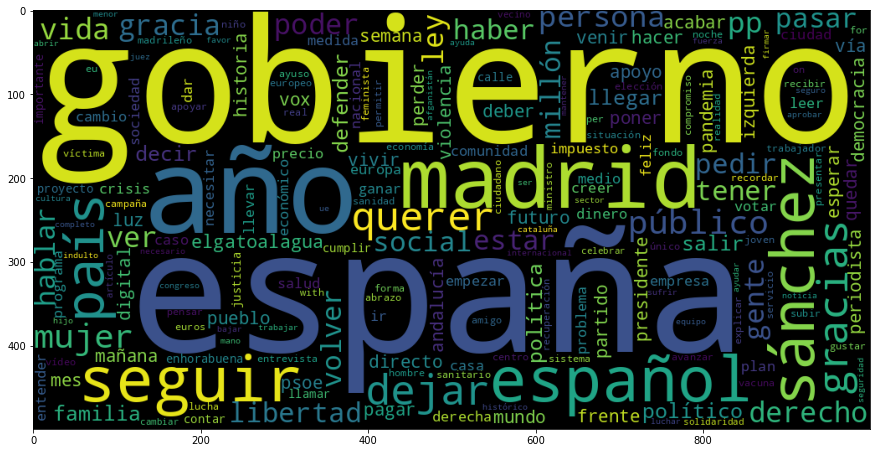

In [47]:
#To clarify us and analyse results we are going to plot data as a wordcloud:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(dictionary)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

wordcloud.to_file('../wordcloud_bad.png')

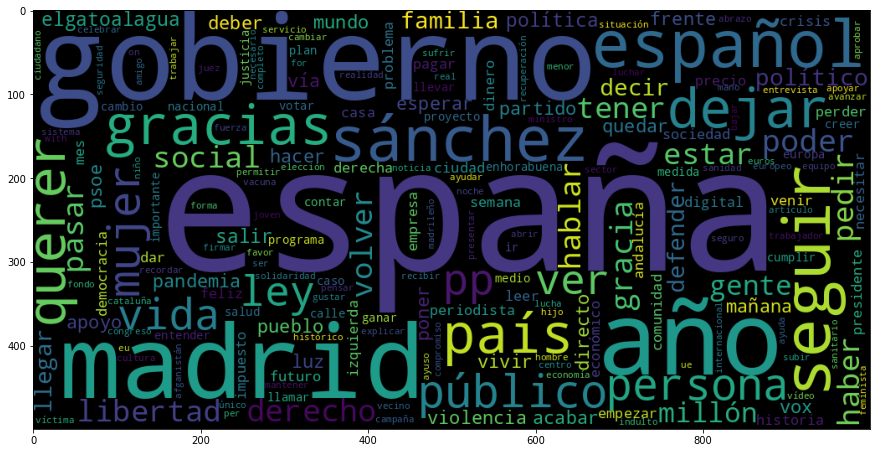

In [46]:
#We can see tha there are some stopwords (in spanish and english) that we should delete:

delete = {
    'a', 'y', 'o', 'of', 'in', 'i', 'to', 'e', 'm', 'and', 'the'
}

dictionary_2 = dictionary
for i in delete:
    dictionary_2[i] = 0

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(dictionary_2)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

wordcloud.to_file('../wordcloud.png')

In [48]:
colunms = ['Word','Frequency']

k = dictionary_2.keys()
v = dictionary_2.values()

df_dictionary = pd.DataFrame(zip(k, v), columns=colunms)
df_dictionary = df_dictionary.sort_values(by='Frequency', ascending=False).reset_index()
df_dictionary = df_dictionary[['Word','Frequency']]
print(df_dictionary)
df_dictionary.to_csv('df_freq.csv', index=False)

           Word  Frequency
0        españa       3469
1      gobierno       3439
2           año       2595
3        madrid       2508
4       español       2039
...         ...        ...
41652         m          0
41653         a          0
41654         e          0
41655        in          0
41656        of          0

[41657 rows x 2 columns]


In [64]:
"""dicccionario_roberto = dict()
for i in tokenized_data:
    if(i[0]=='@RobertoVaquero_'):
        for palabra in i[1]:
            if(palabra in dicccionario_roberto):
                dicccionario_roberto[palabra] += 1
            else:
                dicccionario_roberto[palabra] = 1
                
delete = {
    'a', 'y', 'o', 'of', 'in', 'i', 'to', 'e', 'm', 'and', 'the'
}

for i in delete:
    dicccionario_roberto[i] = 0

                
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(dicccionario_roberto)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

wordcloud.to_file('../roberto.png')            """

"dicccionario_roberto = dict()\nfor i in tokenized_data:\n    if(i[0]=='@RobertoVaquero_'):\n        for palabra in i[1]:\n            if(palabra in dicccionario_roberto):\n                dicccionario_roberto[palabra] += 1\n            else:\n                dicccionario_roberto[palabra] = 1\n                \ndelete = {\n    'a', 'y', 'o', 'of', 'in', 'i', 'to', 'e', 'm', 'and', 'the'\n}\n\nfor i in delete:\n    dicccionario_roberto[i] = 0\n\n                \nwordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(dicccionario_roberto)\nplt.figure(figsize=(15,8))\nplt.imshow(wordcloud)\n\nwordcloud.to_file('../roberto.png')            "